###  What are outliers?
*    Outliers are the values that look different from the other values in the data.
<img src = "outlier.png" width=50%>

### Reasons for outliers in data

*    Errors during data entry or a faulty measuring device (a faulty sensor may result in extreme readings).
*    Natural occurrence (salaries of junior level employees vs C-level employees)

### Problems caused by outliers

*    Outliers in the data may causes problems during model fitting (esp. linear models).
*    Outliers may inflate the error metrics which give higher weights to large errors (example, mean squared error, RMSE).


### Why do we need to Detect Outliers?

Outliers can impact the results of our analysis and statistical modeling in a drastic way. Check out the below image to visualize what happens to a model when outliers are present versus when they have been dealt with:

<img src = "01.png" width=50%>


* “Outliers are not necessarily a bad thing. These are just observations that are not following the same pattern as the other ones. But it can be the case that an outlier is very interesting. For example, if in a biological experiment, a rat is not dead whereas all others are, then it would be very interesting to understand why. This could lead to new scientific discoveries.  So, it is important to detect outliers.”

#  BoxPlot
Box plots are a visual method to identify outliers. Box plots is one of the many ways to visualize data distribution. Box plot plots the q1 (25th percentile), q2 (50th percentile or median) and q3 (75th percentile) of the data along with (q1–1.5*(q3-q1)) and (q3+1.5*(q3-q1)). Outliers, if any, are plotted as points above and below the plot.
<img src = "box.png">


# Inter Quartile Range (IQR)
Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal. According to this procedure, we need to follow the following steps:

*    Find the first quartile, Q1.
*    Find the third quartile, Q3.
*    Calculate the IQR. IQR = Q3-Q1.
*    Define the normal data range with lower limit as Q1–1.5*IQR and upper limit as Q3+1.5*IQR.
*    Any data point outside this range is considered as outlier and should be removed for further analysis.

<img src = "1.png" width=50%>

#### In boxplot, this IQR method is implemented to detect any extreme data point where the maximum point (the end of high whisker) is Q3+1.5*IQR and the minimum point (the start of low whisker) is Q1–1.5*IQR.




#  Z-score
<img src = "Z-score-formula.jpg" width=20%>


Z-score is just another form of standard deviation procedure. (**Assumption– The features are normally or approximately normally distributed.)**


– The data points which fall below mean-3*(sigma) or above mean+3*(sigma) are outliers.

where mean and sigma are the average value and standard deviation of a particular column.mean= 0.

<img src = "3.png" width=50%>


# Outlier detection in a nutshell
* For Normal distributions: Use empirical relations of Normal distribution.

– The data points which fall below mean-3*(svd) or above mean+3*(svd) are outliers.
* For Skewed distributions: Use Inter-Quartile Range (IQR) proximity rule.

– The data points which fall below (Q1 – 1.5 IQR) or above (Q3 + 1.5 IQR) are outliers.
* For Other distributions: Use percentile-based approach.

For Example, Data points that are far from 99% percentile and less than 1 percentile are considered an outlier.
<img src = "2.png" width=70%>


# code

In [17]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)
import seaborn as sns

from matplotlib.cbook import boxplot_stats
from matplotlib import cbook

In [18]:
df = pd.read_csv("../../00 DATA/weight-height.csv")
df.sample(5)

,Gender,Height,Weight
5862,Female,63.963227,110.581002
5410,Female,64.785806,147.190935
2489,Male,69.798457,181.418074
3259,Male,73.682466,211.285555
9633,Female,70.350015,202.237214


In [19]:
df.drop('Weight', axis=1, inplace=True)

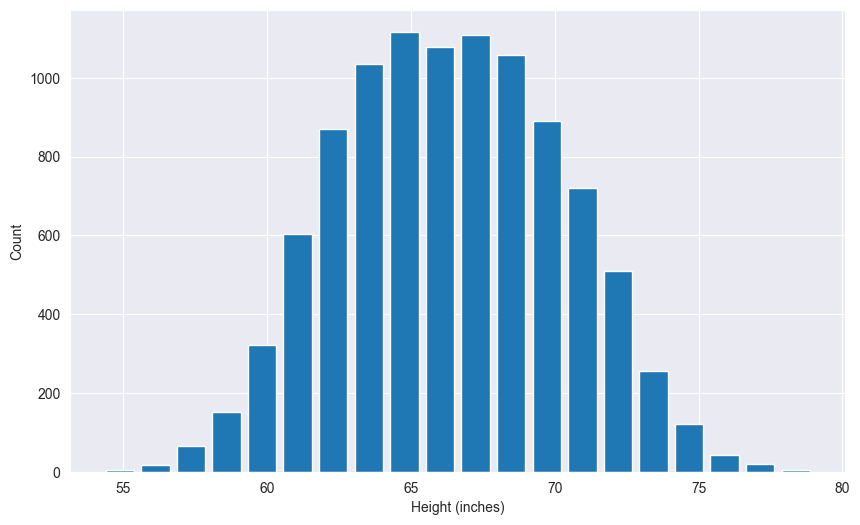

In [20]:

plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

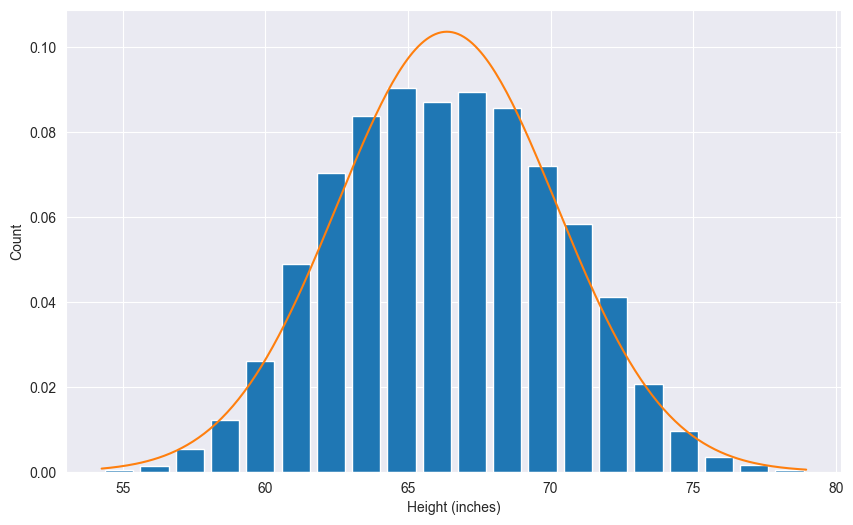

In [21]:
from scipy.stats import norm
import numpy as np

plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.Height.mean(), df.Height.std()))

## 1.Handling Outliers (BoxPlot)

In [23]:
import plotly.express as ex
ex.box(x='Height', data_frame=df)